# Sequential Forward/Backward Selection with mlxtend(Machine Learning Extensions)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# 載入 Iris 數據集
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 查看數據集的一些信息
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# 假設 'df' 是事先載入的資料集，下面將特徵與標籤分開
X = df.iloc[:, :-1]  # 特徵集，選擇資料集中的所有列（除了最後一列）作為特徵
y = df.iloc[:, -1]   # 標籤集，選擇資料集的最後一列作為目標變數

# 初始化邏輯回歸模型，並設定最大迭代次數為 1000，避免在某些情況下模型無法收斂
lr = LogisticRegression(max_iter=1000)

# 初始化 Sequential Forward Selection (SFS)
# k_features=4: 指定要選擇 4 個最佳特徵
# forward=True: 使用順序前向選擇，即從無特徵開始，逐步加入最佳的特徵
# floating=False: 禁用浮動選擇，即選擇固定數量的特徵
# scoring='accuracy': 使用準確度作為評估標準
# cv=0: 不進行交叉驗證，直接在訓練集上進行特徵選擇。若需要交叉驗證，可以設為其他正整數，例如 5
sfs = SFS(lr,
          k_features=4,  # 設置選擇 4 個最重要的特徵
          forward=True,  # 開啟順序前向選擇
          floating=False,  # 不進行浮動選擇
          scoring='accuracy',  # 使用準確度作為評分標準
          cv=0)  # 設置為 0，表示無交叉驗證，僅基於訓練集進行

# 訓練順序前向選擇模型，並選擇最適合的特徵
sfs.fit(X, y)  

# 顯示選擇的最佳特徵索引
print("Selected features indices:", sfs.k_feature_idx_)

# 根據選中的特徵索引顯示具體的特徵名稱
selected_feature_names = X.columns[list(sfs.k_feature_idx_)]  
print("Selected features:", selected_feature_names)

# 顯示選擇特徵的準確度
print(f"Selected feature subset accuracy: {sfs.k_score_:.4f}")

Selected features indices: (0, 1, 2, 3)
Selected features: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
Selected feature subset accuracy: 0.9733


/Users/benson/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/benson/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


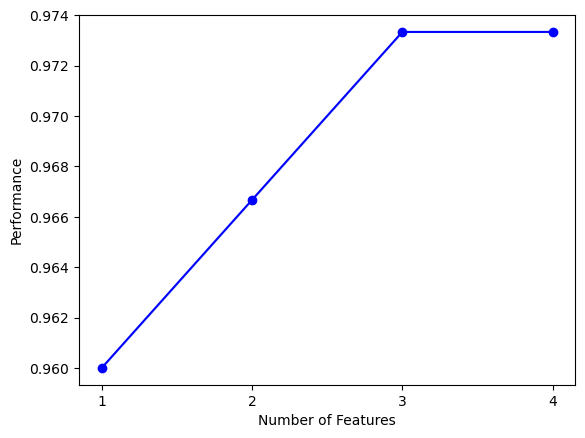

In [3]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# 繪製隨著特徵數量變化的模型準確度曲線
plot_sfs(sfs.get_metric_dict())  
plt.show()

# 順序後向選擇 (SBS, Sequential Backward Selection) 

In [4]:
# 順序後向選擇 (SBS, Sequential Backward Selection) 
sfs = SFS(lr,
          k_features=2,  # 設置選擇 2 個最重要的特徵
          forward=False,  # 開啟順序後向選擇
          floating=False,  # 不進行浮動選擇
          scoring='accuracy',  # 使用準確度作為評分標準
          cv=0)  # 設置為 0，表示無交叉驗證，僅基於訓練集進行

# 訓練順序前向選擇模型，並選擇最適合的特徵
sfs.fit(X, y)  

# 顯示選擇的最佳特徵索引
print("Selected features indices:", sfs.k_feature_idx_)

# 根據選中的特徵索引顯示具體的特徵名稱
selected_feature_names = X.columns[list(sfs.k_feature_idx_)]  
print("Selected features:", selected_feature_names)

# 顯示選擇特徵的準確度
print(f"Selected feature subset accuracy: {sfs.k_score_:.4f}")

Selected features indices: (2, 3)
Selected features: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')
Selected feature subset accuracy: 0.9667


# Recursive feature elimination(REF) with scikit-learn

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE  # 引入遞迴特徵消除方法
from sklearn.preprocessing import StandardScaler  # 引入標準化處理

# 載入資料
X = np.array(df.iloc[:, :-1])  # 特徵集，假設最後一列是目標變數
y = np.array(df.iloc[:, -1])   # 標籤集，假設最後一列是目標變數

# 標準化特徵集，使其均值為0，方差為1
X = StandardScaler().fit_transform(X)  # 使用 StandardScaler 進行標準化處理

# 初始化邏輯回歸模型
lr = LogisticRegression(max_iter=1000)  # 設定最大迭代次數為1000，防止收斂問題

# 遞迴特徵消除 (RFE)，選擇最好的3個特徵
rfe = RFE(lr, n_features_to_select=3)  # 設定選擇3個特徵

# 訓練RFE模型並擬合數據
rfe.fit(X, y)

# 顯示使用RFE選擇的特徵對應的準確度
print(f'Accuracy of the model with RFE-selected features: {rfe.score(X, y):.4f}')

# 顯示每個特徵的排名，數字越小表示越重要
print("Feature ranking:", rfe.ranking_)

# 顯示哪些特徵被選擇了 (True代表被選擇，False代表被排除)
print("Selected features:", rfe.support_)

Accuracy of the model with RFE-selected features: 0.9733
Feature ranking: [2 1 1 1]
Selected features: [False  True  True  True]


In [6]:
import datetime

current_date = datetime.datetime.now().strftime("%Y年%m月%d日")
print(f"更新日期: {current_date}")

更新日期: 2024年12月01日
